# Data Modelling


- Importing data from the **'EDA Data.csv'** file obtained from exploration file (*That Files is also uploaded in same repository as thsi notebook*)

- In this section we will run model using machine learning models to understand variation of salary with different paramerters

In [1]:
# Importing libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('EDA Data.csv')
df.columns


Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'job_simp', 'seniority', 'hourly',
       'employer provided', 'Avg_Salary', 'company', 'same_state', 'state',
       'company_age', 'python_yn', 'vis_yn', 'sql_yn', 'R_yn', 'PySpark_yn',
       'ML_yn', 'BigData_yn', 'rating', 'job_desc', 'adv_degree',
       'compete_num'],
      dtype='object')

In [2]:
# Choosing relevant columns for modelling, in reference to correlation conducted in eda file!

df_model = df[['Avg_Salary','rating','Size','Industry','Type of ownership','Sector', 'Revenue','compete_num',
            'hourly','employer provided','same_state','Location', 'company_age', 'python_yn',
            'ML_yn','adv_degree', 'PySpark_yn','job_simp', 'seniority']]
df_model.head()

,Avg_Salary,rating,Size,Industry,Type of ownership,Sector,Revenue,compete_num,hourly,employer provided,same_state,Location,company_age,python_yn,ML_yn,adv_degree,PySpark_yn,job_simp,seniority
0,72.0,3.8,501 to 1000 employees,Aerospace & Defense,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,0,0,"Albuquerque, NM",47,1,1,0,0,data scientist,na
1,87.5,3.4,10000+ employees,Health Care Services & Hospitals,Other Organization,Health Care,$2 to $5 billion (USD),0,0,0,0,"Linthicum, MD",36,1,1,0,0,data scientist,na
2,85.0,4.8,501 to 1000 employees,Security Services,Company - Private,Business Services,$100 to $500 million (USD),0,0,0,1,"Clearwater, FL",10,1,1,1,1,data scientist,na
3,76.5,3.8,1001 to 5000 employees,Energy,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,1,"Richland, WA",55,1,1,0,0,data scientist,na
4,114.5,2.9,51 to 200 employees,Advertising & Marketing,Company - Private,Business Services,Unknown / Non-Applicable,3,0,0,1,"New York, NY",22,1,1,0,0,data scientist,na


In [3]:
# Getting Dummies for strings

df_dum = pd.get_dummies(df_model)

df_dum.shape

(741, 339)

In [4]:
df_dum.head()

,Avg_Salary,rating,compete_num,hourly,employer provided,same_state,company_age,python_yn,ML_yn,adv_degree,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
# Generating train and test values split using sklearn's train test split library

from sklearn.model_selection import train_test_split

x = df_dum.drop(['Avg_Salary'],axis = 1)
y = df_dum.Avg_Salary.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [6]:
# Linear Regression in StatsModels 

import statsmodels.api as sm
x = sm.add_constant(x) # adding a constant


model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()


# If P>|t| values present there are more than 0.05 the columns stands as a non significant column!

In [7]:
# Multi-Variable Linear Regression through Sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
# Cross Val Score takes samples from the data, run and evaluates the model

lr = LinearRegression()

lr.fit(x_train,y_train)

print('r2 value for linear regression:',lr.score(x_test,y_test))

print('cross validation score for lin. reg.:'
      , np.mean(cross_val_score(lr,x_train,y_train,scoring = 'neg_mean_absolute_error', cv = 3)))


# The returned r2 Valuess are dimensionally so large and we performed cross validation library to understand data 
# the mean r2 fo sample staken by machine yieled yet again a dimensionally larget number!

# The data set isnt large enough for the linear model to run and retrun the desired values

r2 value for linear regression: -6112644871854929.0
cross validation score for lin. reg.: -8186067154.25883


In [8]:
# Now we normalise the values using lasso regression technique

from sklearn.linear_model import Lasso
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
la = Lasso(alpha = 0.03)

la.fit(x_train,y_train)
np.mean(cross_val_score(la,x_train,y_train,cv = 3, scoring = 'neg_mean_absolute_error'))


-19.233363872504597

In [9]:
alpha = []
error = []

for i in range (1,1000):
    alpha.append(i/100)
    la2 = Lasso(alpha=(i/100)) 
    error.append(np.mean(cross_val_score(la2,x_train,y_train,cv = 3, scoring = 'neg_mean_absolute_error')))


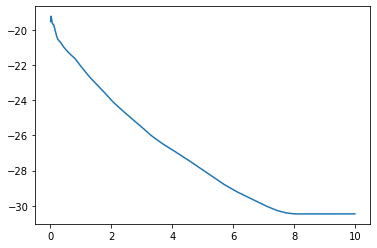

In [10]:
plt.plot(alpha,error)

In [11]:
err = tuple(zip(alpha,error))

df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

# This shows that our error value is minimum(as values are negative) at alpha value = 0.03
# at -19.233 model already at a better position than in linear regression model!

,alpha,error
2,0.03,-19.233364


In [12]:
# Trying Random Forest regression model for our data

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor() 

rf.fit(x_train,y_train)

print(np.mean(cross_val_score(rf,x_train,y_train,cv = 5, scoring = 'neg_mean_absolute_error')))
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
y_pred = rf.predict(x_test)


# Random Forest model returned a better error score than lasso normalised score

-14.433195080520653
0.9603181705055517
0.8065435068514394


In [13]:
# GridsearchCV - Tuning Models
# Hyper parameter tuning will be done now to understand which parameter of random rorest gives us the best score

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range (10,300,10), 'criterion':('mse','moe'), 'max_features':('auto','sqrt','log2')}
# Trying different parameters possible in order to get a better result

gs = GridSearchCV(rf, parameters, cv = 5, scoring = 'neg_mean_absolute_error')

gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [14]:
# Best score
gs.best_score_

-13.832716616948037

In [15]:
# Parameters at best score
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
# test ensembles 
tpred_la = lr.predict(x_test)
tpred_la2 = la.predict(x_test) # Test prediction using lass normalised linear fit
tpred_rf = gs.best_estimator_.predict(x_test) 
# Test prediction using bets parameters found in gridserach cv of random forest

from sklearn.metrics import mean_absolute_error

print('Mean Absolute error in Linear Regression :',mean_absolute_error(y_test,tpred_la))
print('Mean Absolute error in Lasso Normalised Linear Model:',mean_absolute_error(y_test,tpred_la2))
print('Mean Absolute error in Random Forest :',mean_absolute_error(y_test,tpred_rf))
print('Average Mean Absolute error from lasso and Random Forest models :',mean_absolute_error(y_test,(tpred_la2+tpred_rf)/2))

Mean Absolute error in Linear Regression : 711318647.0331476
Mean Absolute error in Lasso Normalised Linear Model: 16.686390123971524
Mean Absolute error in Random Forest : 11.654949884837066
Average Mean Absolute error from lasso and Random Forest models : 12.943514599704455
